# Insurance Charges Prediction

## Introduction
This notebook explores the insurance dataset to build and evaluate different regression models. The dataset includes information such as age, sex, BMI, number of children, smoking status, and region, with the goal of predicting insurance charges.

In [1]:
import pandas as pd
import numpy as np

## Data Description
The dataset consists of the following features:
- **age**: Age of the insured individual.
- **sex**: Gender of the insured (Male/Female).
- **bmi**: Body Mass Index of the insured.
- **children**: Number of children/dependents covered by the insurance.
- **smoker**: Whether the insured is a smoker (Yes/No).
- **region**: Geographical region of the insured (Northwest, Southeast, Southwest, or Northeast).
- **charges**: Insurance charges billed to the individual.

The dataset is analyzed to understand the relationships between these features and the insurance charges.

In [2]:
df = pd.read_csv('/content/insurance.csv')
#df = pd.read_csv('/kaggle/input/ushealthinsurancedataset/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA)
In this section, we perform exploratory data analysis to understand the dataset better. We will:
- Check for missing values.
- Visualize the distribution of numerical features.
- Analyze correlations between numerical features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### Feature Distributions

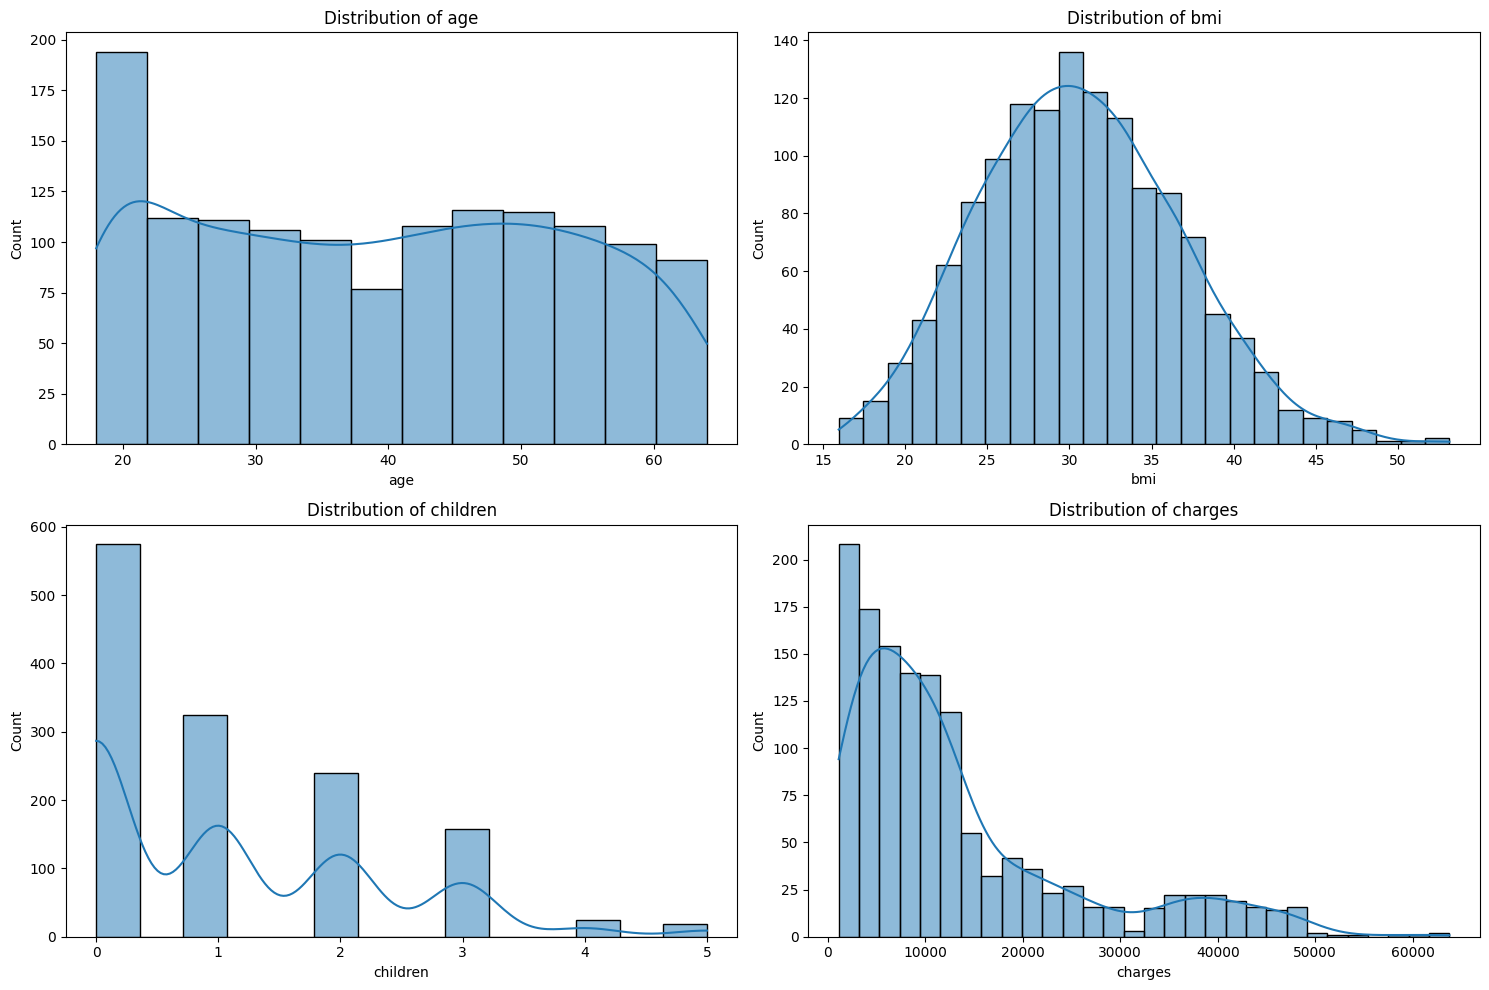

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Correlation Matrix
We visualize the correlation matrix to understand the relationships between numerical features.

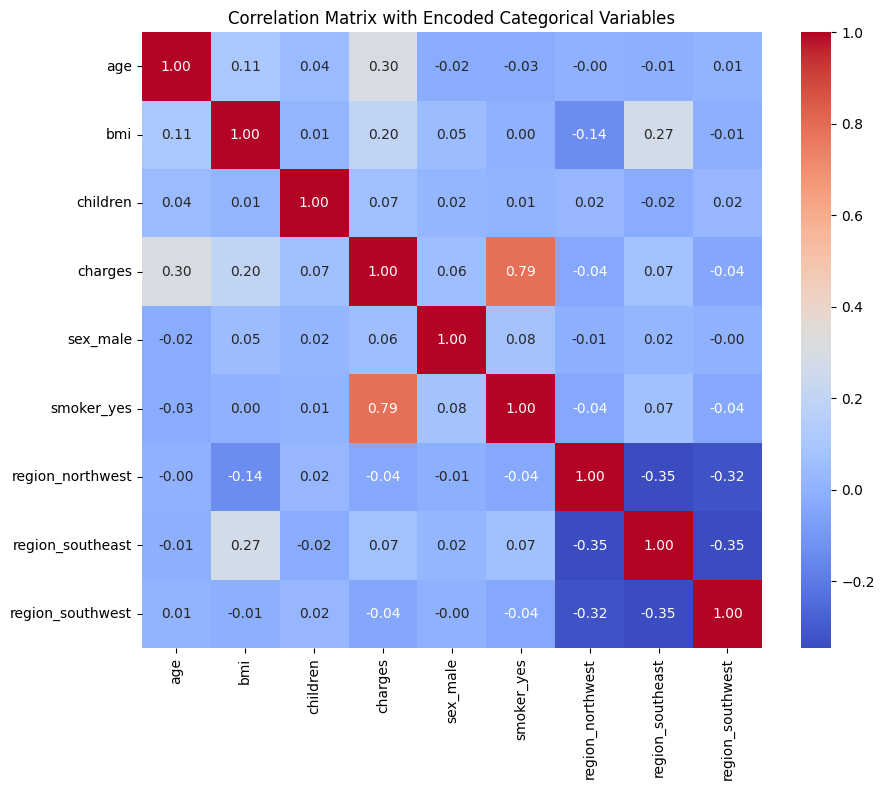

In [8]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

corr = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Encoded Categorical Variables')
plt.show()

### Pairwise Plots for Features:

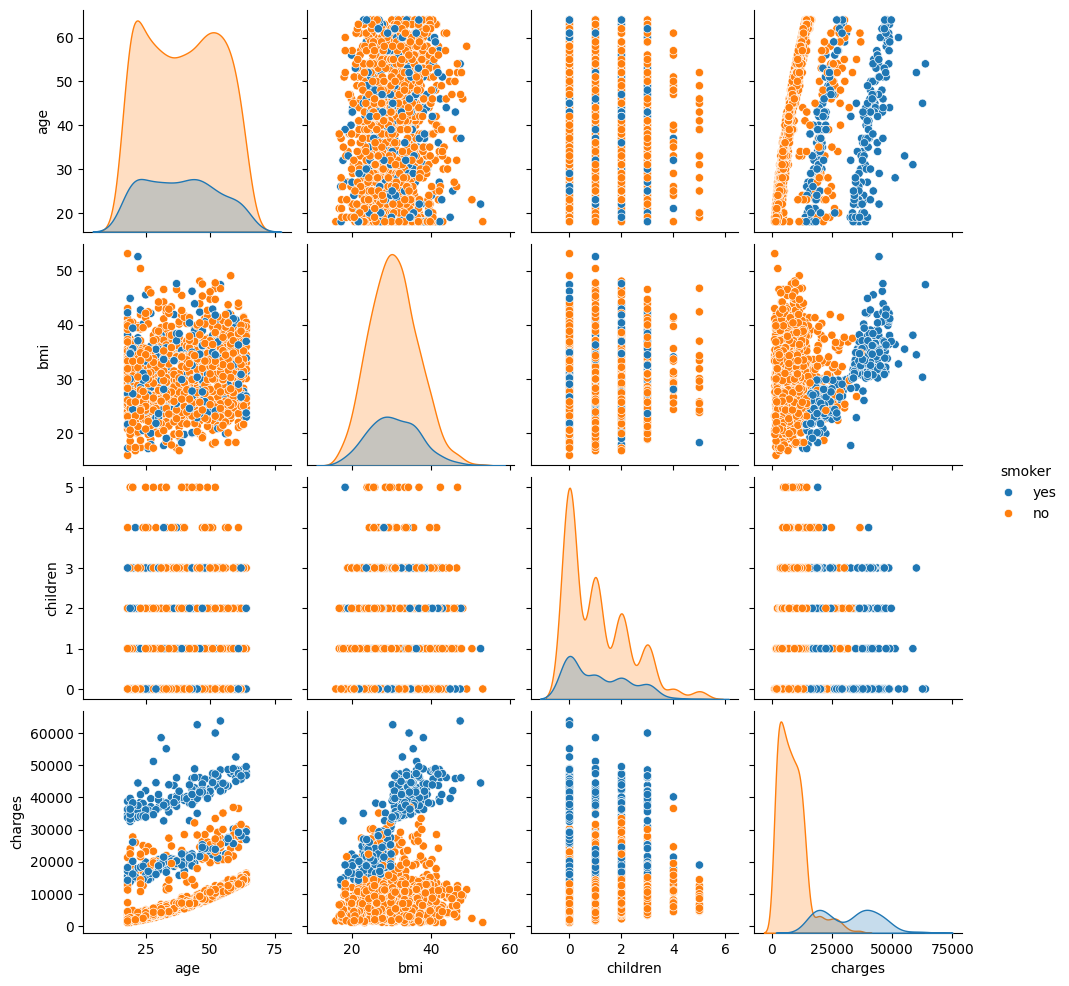

In [9]:
sns.pairplot(df, hue='smoker')
plt.show()

## Data Preprocessing
Before building the models, we need to preprocess the data. This involves:
- Encoding categorical variables.
- Scaling numerical features.

### Encoding Categorical Variables


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#### Define the preprocessing steps

In [11]:
X = df.drop('charges', axis=1)
y = df['charges']

categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building and Evaluation
We build and evaluate different regression models to predict insurance charges. The models include Linear Regression, Polynomial Regression, and K-Nearest Neighbors

### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

linear_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

linear_reg_pipeline.fit(X_train, y_train)

pred_linear_reg = linear_reg_pipeline.predict(X_test)

#### Evaluate the model

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, pred_linear_reg)
mae = mean_absolute_error(y_test, pred_linear_reg)
r2score = r2_score(y_test, pred_linear_reg)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R squared: {r2score}")

Mean Squared Error: 33596915.85136146
Mean Absolute Error: 4181.194473753649
R squared: 0.7835929767120723


#### Visualization

<ipython-input-14-3370de412a63>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


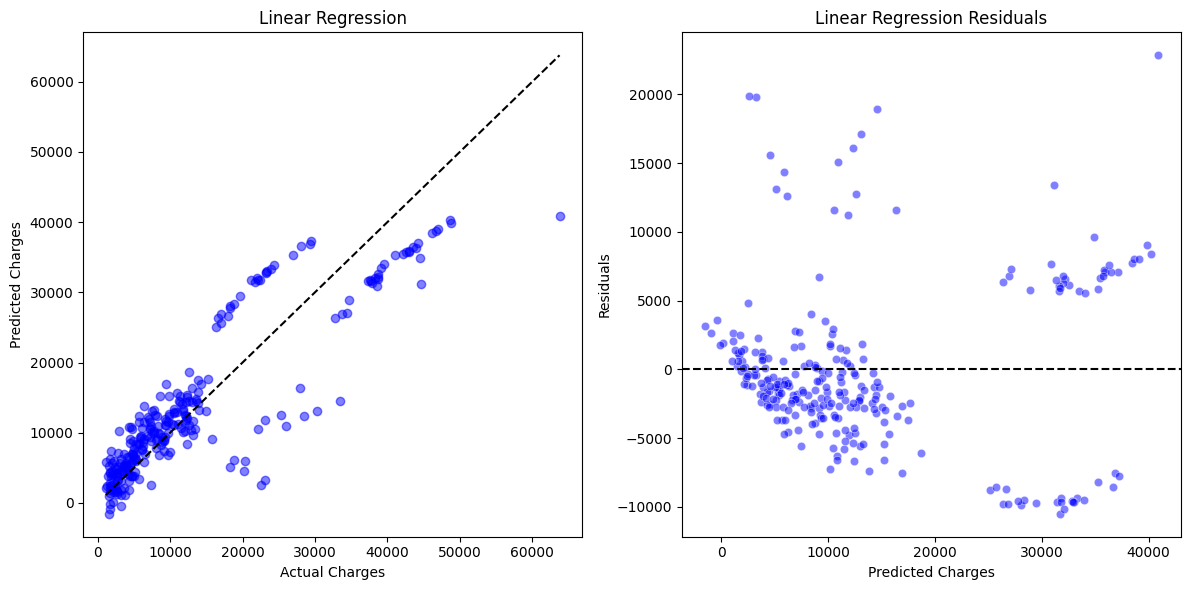

In [14]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, pred_linear_reg, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
sns.scatterplot(x=pred_linear_reg, y=y_test - pred_linear_reg, color='blue', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')

plt.tight_layout()
plt.show()

### Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

poly_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

param_grid_poly = {
    'poly__degree': [2, 3, 4],
    'poly__include_bias': [True, False],
    'model__fit_intercept': [True, False]
}

grid_search_poly = GridSearchCV(poly_reg_pipeline, param_grid_poly, cv=5, scoring='neg_mean_squared_error', n_jobs = -1)

grid_search_poly.fit(X_train, y_train)

best_poly_model = grid_search_poly.best_estimator_
poly_predictions = best_poly_model.predict(X_test)

#### Evaluating the results

In [16]:
mse_poly = mean_squared_error(y_test, poly_predictions)
mae_poly = mean_absolute_error(y_test, poly_predictions)
r2_poly = r2_score(y_test, poly_predictions)

print(f"Best Polynomial Regression Model Parameters: {grid_search_poly.best_params_}")
print(f"Best Score for Polynomial Regression: {-grid_search_poly.best_score_}")
print(f"Mean Squared Error: {mse_poly}")
print(f"Mean Absolute Error: {mae_poly}")
print(f"R squared: {r2_poly}")

Best Polynomial Regression Model Parameters: {'model__fit_intercept': True, 'poly__degree': 2, 'poly__include_bias': True}
Best Score for Polynomial Regression: 24447087.440964468
Mean Squared Error: 20712805.987918362
Mean Absolute Error: 2729.5001336394453
R squared: 0.8665830903164841


#### Visualization

<ipython-input-17-1119b684e372>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


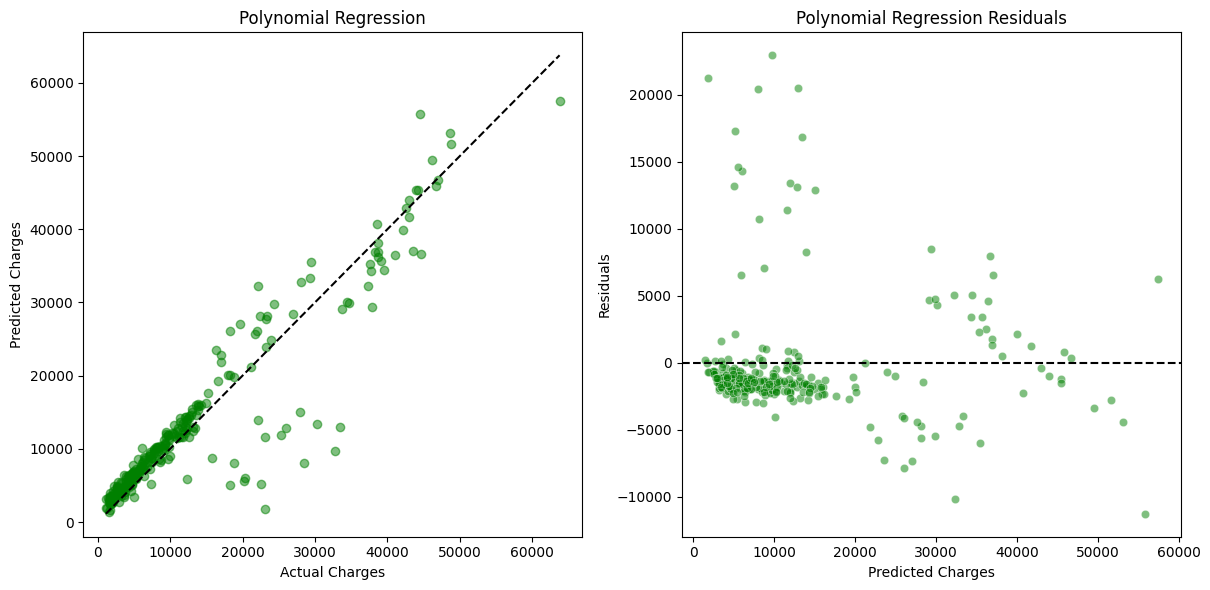

In [17]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, poly_predictions, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Polynomial Regression')

plt.subplot(1, 3, 2)
sns.scatterplot(x=poly_predictions, y=y_test - poly_predictions, color='green', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Polynomial Regression Residuals')

plt.tight_layout()
plt.show()

### K-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])

param_grid_knn = {
    'model__n_neighbors': [2, 3, 4, 5, 6, 7],
    'model__metric': ['euclidean', 'manhattan'],
    'model__weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs = -1)

grid_search_knn.fit(X_train, y_train)

best_knn_model = grid_search_knn.best_estimator_
knn_predictions = best_knn_model.predict(X_test)

#### Evaluating the results

In [19]:
mse_poly = mean_squared_error(y_test, knn_predictions)
mae_poly = mean_absolute_error(y_test, knn_predictions)
r2_poly = r2_score(y_test, knn_predictions)

print(f"Best Polynomial Regression Model Parameters: {grid_search_knn.best_params_}")
print(f"Best Score for Polynomial Regression: {-grid_search_knn.best_score_}")
print(f"Mean Squared Error: {mse_poly}")
print(f"Mean Absolute Error: {mae_poly}")
print(f"R squared: {r2_poly}")

Best Polynomial Regression Model Parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__weights': 'distance'}
Best Score for Polynomial Regression: 40301203.76414652
Mean Squared Error: 37984876.27096501
Mean Absolute Error: 3618.18750980737
R squared: 0.7553289105426424


#### Visualization

<ipython-input-20-7858dfcce993>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


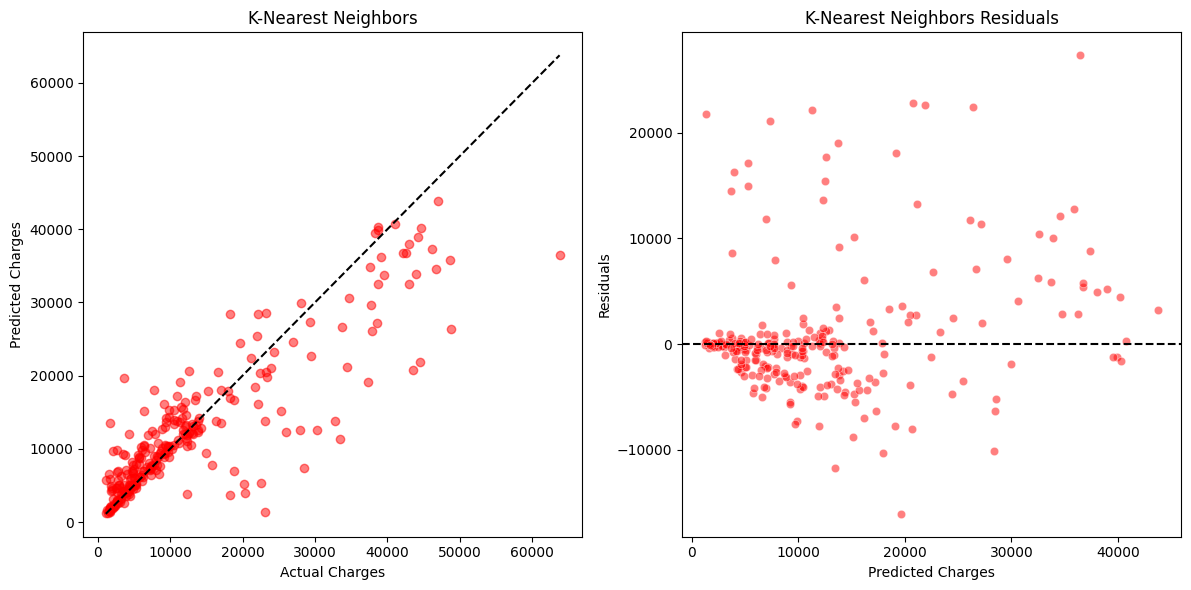

In [20]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, knn_predictions, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('K-Nearest Neighbors')

plt.subplot(1, 3, 2)
sns.scatterplot(x=knn_predictions, y=y_test - knn_predictions, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('K-Nearest Neighbors Residuals')

plt.tight_layout()
plt.show()

### Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])

param_grid_decision_tree = {
    'model__criterion': ['squared_error', 'friedman_mse', 'poisson'],
    'model__max_depth': [None, 10, 20, 30, 40, 50],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': [None, 'sqrt', 'log2'],
    'model__max_leaf_nodes': [None, 10, 20, 30]
}

grid_search_decision_tree = GridSearchCV(decision_tree_pipeline, param_grid_decision_tree, cv=5, scoring='neg_mean_squared_error', n_jobs = -1)

grid_search_decision_tree.fit(X_train, y_train)

best_decision_tree_model = grid_search_decision_tree.best_estimator_
decision_tree_predictions = grid_search_decision_tree.predict(X_test)

#### Evaluating the results

In [62]:
mse_poly = mean_squared_error(y_test, decision_tree_predictions)
mae_poly = mean_absolute_error(y_test, decision_tree_predictions)
r2_poly = r2_score(y_test, decision_tree_predictions)

print(f"Best Decision Tree Regression Model Parameters: {grid_search_decision_tree.best_params_}")
print(f"Best Score for Decsion Tree Regression: {-grid_search_decision_tree.best_score_}")
print(f"Mean Squared Error: {mse_poly}")
print(f"Mean Absolute Error: {mae_poly}")
print(f"R squared: {r2_poly}")

Best Decision Tree Regression Model Parameters: {'model__criterion': 'poisson', 'model__max_depth': None, 'model__max_features': None, 'model__max_leaf_nodes': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}
Best Score for Decsion Tree Regression: 23386079.810821675
Mean Squared Error: 22508600.269080546
Mean Absolute Error: 2830.7514171773437
R squared: 0.8550158828816372


#### Visualisation

<ipython-input-28-92f2b7752c38>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


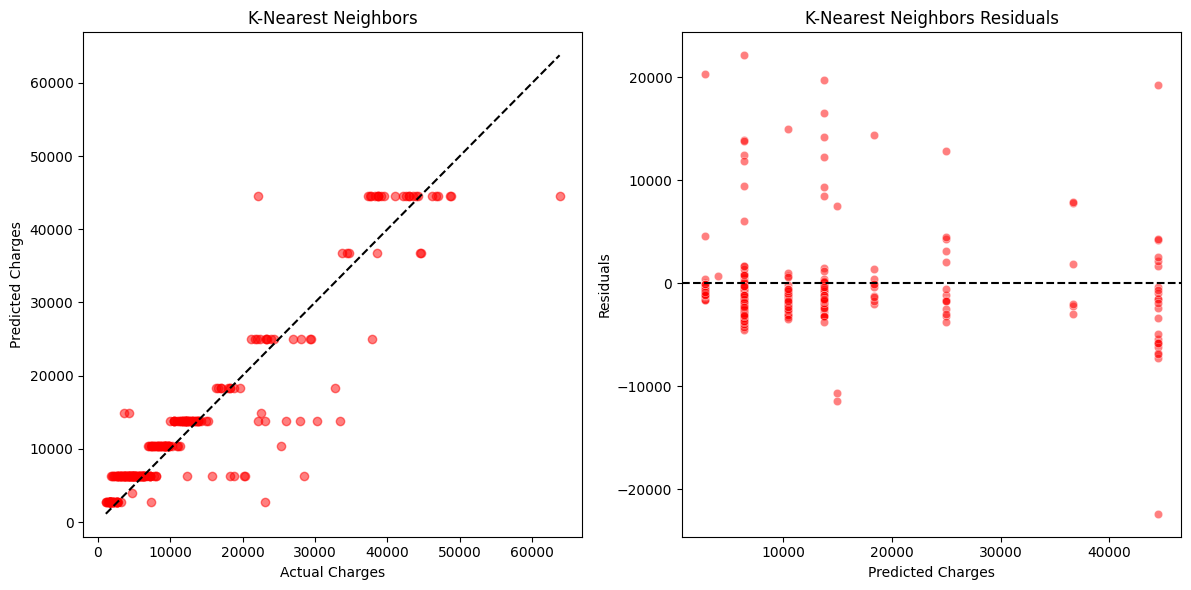

In [28]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, decision_tree_predictions, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Decision Tree Regressor')

plt.subplot(1, 3, 2)
sns.scatterplot(x=decision_tree_predictions, y=y_test - decision_tree_predictions, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Decision Tree Regressor')

plt.tight_layout()
plt.show()

### Model Performance Analysis
The dataset consists of 1,338 entries with features including age, sex, BMI, number of children, smoker status, region, and insurance charges. The analysis compares three regression models: Linear Regression, Polynomial Regression, and K-Nearest Neighbors (KNN).

#### Linear Regression

- Mean Squared Error (MSE): 33,596,915.85
- Mean Absolute Error (MAE): 4,181.19
- R-squared (R²): 0.78

Linear Regression shows a moderate performance with an R-squared value of 0.78, indicating that approximately 78% of the variance in insurance charges is explained by the model. The high MSE and MAE suggest that while the model captures a substantial amount of variance, there is room for improvement in prediction accuracy.

#### Polynomial Regression

- Best Model Parameters: {'model__fit_intercept': True, 'poly__degree': 2, 'poly__include_bias': True}
- Best Score: 24,447,087.44
- Mean Squared Error (MSE): 20,712,805.99
- Mean Absolute Error (MAE): 2,729.50
- R-squared (R²): 0.87

Polynomial Regression performs the best among the three models. With an R-squared value of 0.87, it explains approximately 87% of the variance in insurance charges. The lower MSE and MAE indicate a better fit and more accurate predictions compared to Linear Regression. The polynomial model effectively captures the non-linear relationships in the data.

#### K-Nearest Neighbors (KNN)
- Best Model Parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__weights': 'distance'}
- Best Score: 40,301,203.76
- Mean Squared Error (MSE): 37,984,876.27
- Mean Absolute Error (MAE): 3,618.19
- R-squared (R²): 0.76

KNN shows moderate performance with an R-squared value of 0.76. While it performs reasonably well, its MSE and MAE are higher compared to Polynomial Regression. This suggests that KNN may not capture the data's complexity as effectively as the polynomial model but still provides a reasonable fit.

#### Decision Tree Regressor

- Best Score: 23,386,079.81
- Mean Squared Error (MSE): 22,508,600.27
- Mean Absolute Error (MAE): 2,830.75
- R-squared (R²): 0.85

The Decision Tree Regressor offers a competitive performance, with an R-squared value of 0.85, explaining about 85% of the variance in insurance charges. Its MSE and MAE are lower than those of Linear Regression and KNN, indicating a better fit and improved accuracy in predictions. The decision tree's ability to capture complex interactions and non-linear relationships contributes to its strong performance.

#### Summary

- Polynomial Regression offers the best performer with the lowest MSE and MAE and the highest R-squared value, effectively capturing non-linear relationships in the data.
- Decision Tree Regressor provides strong performance with lower error metrics than Linear Regression and KNN, and its ability to handle complex data interactions makes it a valuable model.
- Linear Regression serves as a good baseline model but underperforms compared to Polynomial Regression and Decision Tree Regressor.
- KNN provides reasonable predictions but does not match the accuracy of Polynomial Regression or Decision Tree Regressor.

#### Visualizations

<ipython-input-61-30b66ad44ede>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-61-30b66ad44ede>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-61-30b66ad44ede>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-61-30b66ad44ede>:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> c

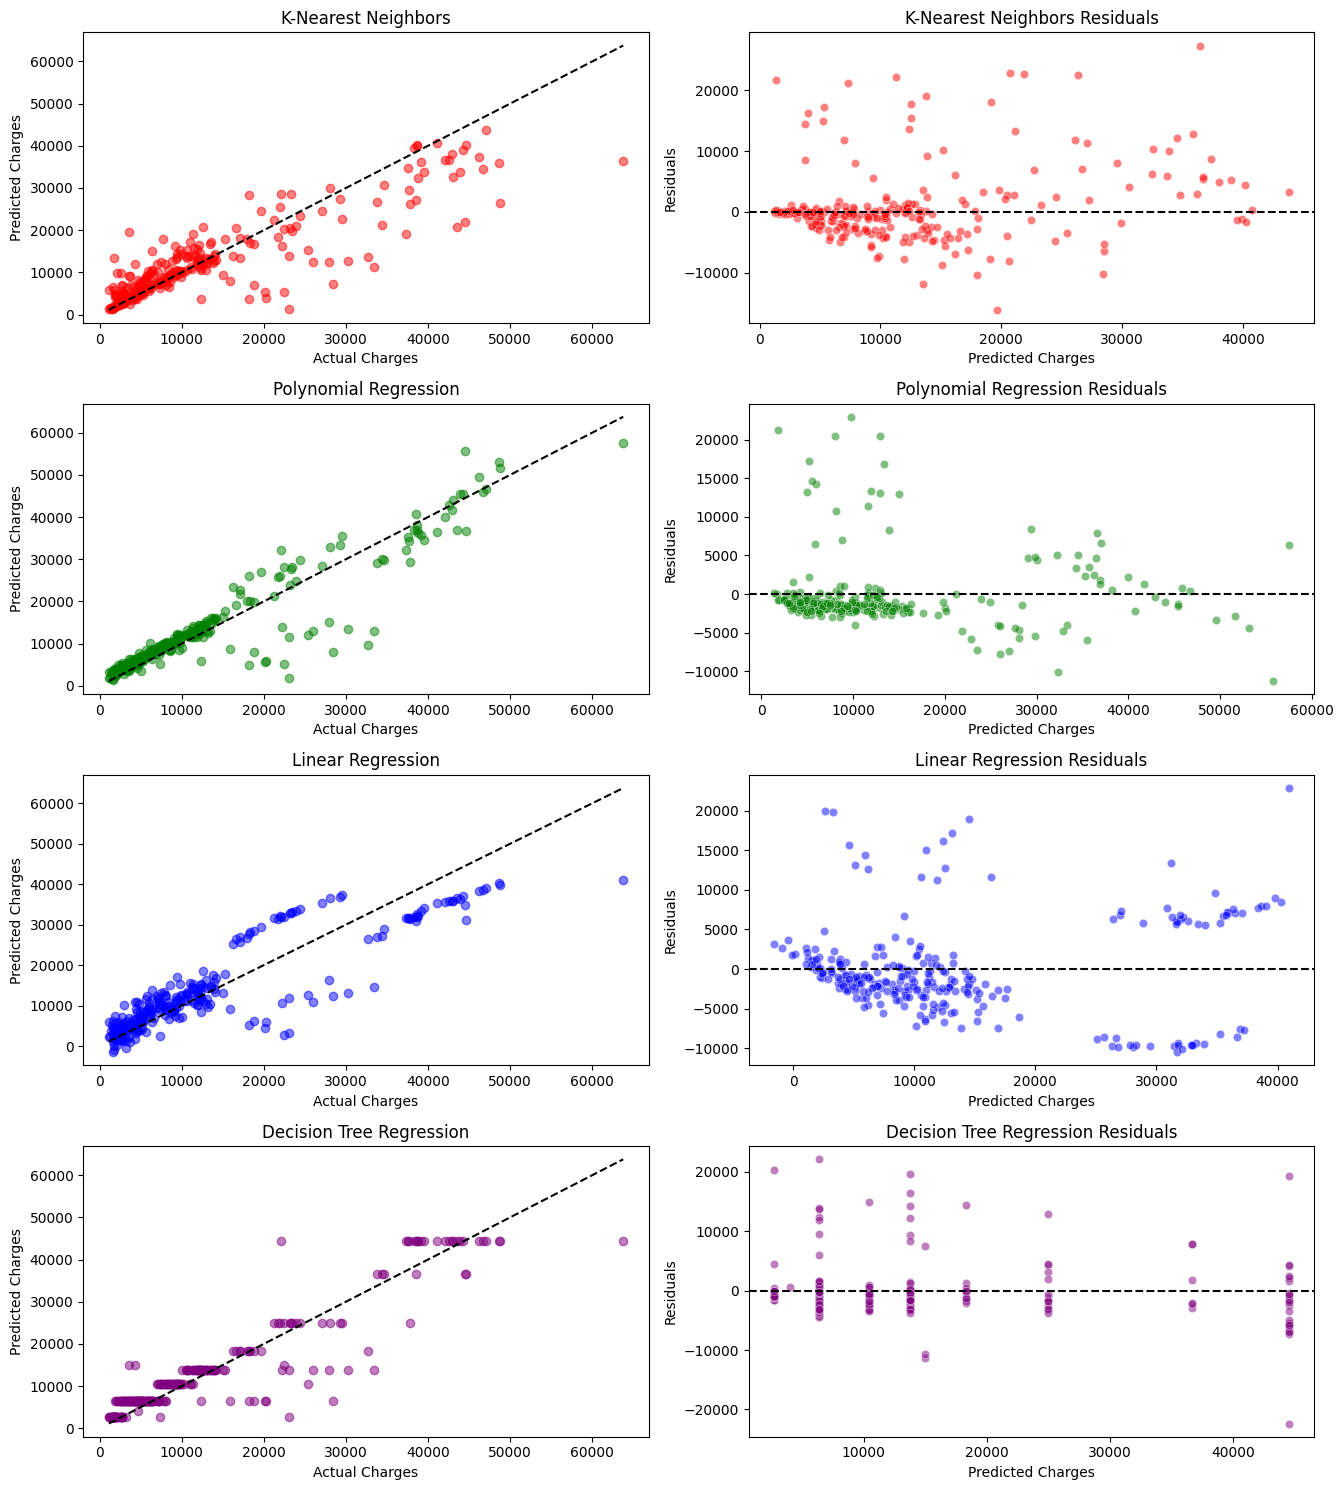

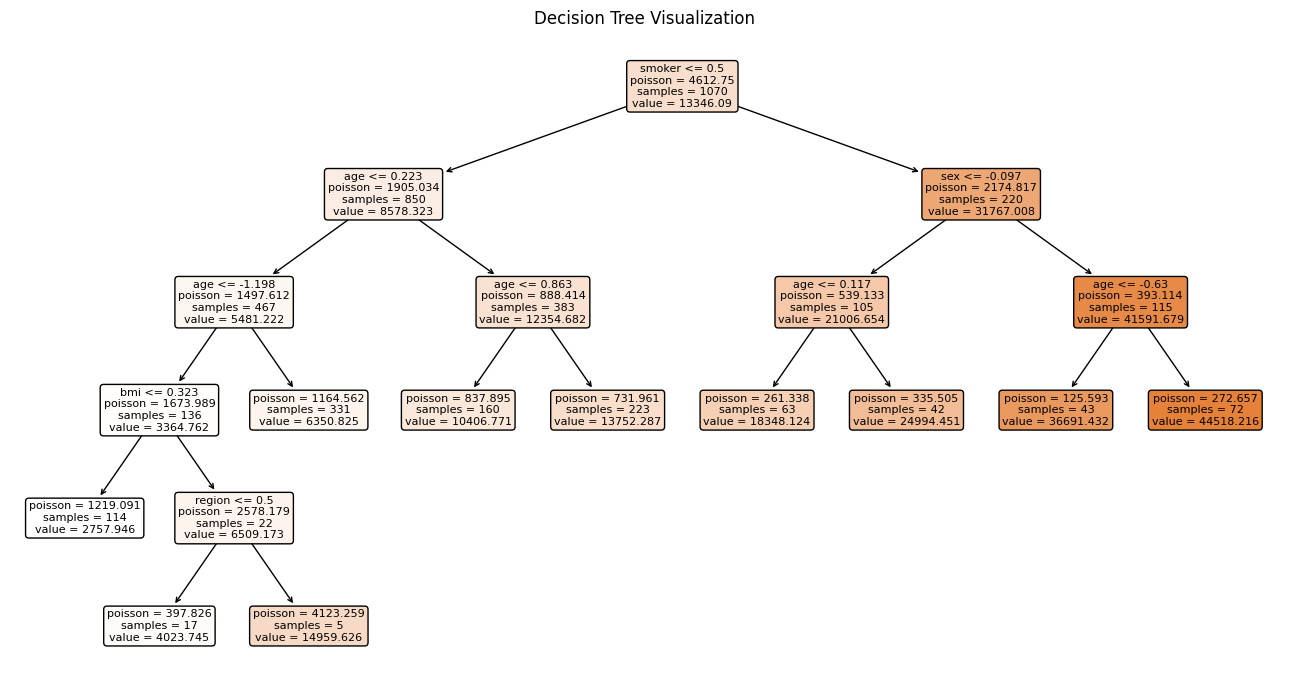

In [61]:
plt.figure(figsize=(20, 15))

# K-Nearest Neighbors (KNN) Plots
plt.subplot(4, 3, 1)
plt.scatter(y_test, knn_predictions, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('K-Nearest Neighbors')

plt.subplot(4, 3, 2)
sns.scatterplot(x=knn_predictions, y=y_test - knn_predictions, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('K-Nearest Neighbors Residuals')

# Polynomial Regression Plots
plt.subplot(4, 3, 4)
plt.scatter(y_test, poly_predictions, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Polynomial Regression')

plt.subplot(4, 3, 5)
sns.scatterplot(x=poly_predictions, y=y_test - poly_predictions, color='green', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Polynomial Regression Residuals')

# Linear Regression Plots
plt.subplot(4, 3, 7)
plt.scatter(y_test, pred_linear_reg, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression')

plt.subplot(4, 3, 8)
sns.scatterplot(x=pred_linear_reg, y=y_test - pred_linear_reg, color='blue', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')

# Decision Tree Regression Plots
plt.subplot(4, 3, 10)
plt.scatter(y_test, decision_tree_predictions, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Decision Tree Regression')

plt.subplot(4, 3, 11)
sns.scatterplot(x=decision_tree_predictions, y=y_test - decision_tree_predictions, color='purple', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Decision Tree Regression Residuals')

plt.tight_layout()
plt.show()

# Create a separate figure for the Decision Tree structure
plt.figure(figsize=(13, 7))
plt.subplot(1, 1, 1)
plot_tree(best_decision_tree_model.named_steps['model'],
          feature_names=X_train.columns,
          filled=True,
          rounded=True,
          fontsize=8)
plt.title('Decision Tree Visualization')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Conclusion

In this comprehensive analysis, we evaluated four regression models—Linear Regression, Polynomial Regression, K-Nearest Neighbors (KNN), and Decision Tree Regressor—for predicting insurance charges using a dataset of 1,338 entries. Each model's performance was assessed based on key metrics, including Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²).

**Polynomial Regression** emerged as the top-performing model. It demonstrated the highest R-squared value of 0.87, indicating that it explains approximately 87% of the variance in insurance charges. Its lower MSE and MAE further highlight its superior predictive accuracy and its capability to capture complex, non-linear relationships in the data effectively. This model proved to be the most accurate and reliable for this dataset, making it the preferred choice for predicting insurance charges.

**Decision Tree Regressor** also exhibited strong performance, with an R-squared value of 0.85. It provided a competitive fit with lower error metrics compared to Linear Regression and KNN. The decision tree's ability to handle complex interactions and non-linear relationships contributed to its robust performance, making it a valuable model for this task.

**K-Nearest Neighbors (KNN)** showed moderate performance with an R-squared value of 0.76. While it provided reasonable predictions, its higher MSE and MAE indicated that it did not capture the data's complexities as effectively as Polynomial Regression or the Decision Tree Regressor. Nevertheless, KNN still offers a viable alternative for predictive modeling.

**Linear Regression** served as a useful baseline model with an R-squared value of 0.78. Although it explains a significant portion of the variance in insurance charges, its higher MSE and MAE compared to the other models suggest that it is less effective in capturing the data's nuances. Linear Regression's primary role was to provide a point of comparison for more advanced models.

Overall, **Polynomial Regression** is recommended for this project due to its superior performance in accuracy and prediction capability. The **Decision Tree Regressor** also provides a strong alternative with its ability to model complex data interactions. Future work could involve further model refinement, exploring additional algorithms, or incorporating more features to enhance prediction accuracy and model robustness. This analysis underscores the importance of choosing the appropriate model based on specific performance metrics and data characteristics to achieve the best predictive outcomes.